In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyabf
import matplotlib.pyplot as plt
# import seaborn as sns
from collections import defaultdict
# import statsmodels.api as sm
# from statsmodels.formula.api import ols

Import dictionaries

In [2]:
with open("binwvsrin_oldNaNs.pkl", "rb") as f:
    binwvsrin_oldNaNs = pickle.load(f)
with open("binwvsrin_newNaNs.pkl", "rb") as f:
    binwvsrin_newNaNs = pickle.load(f)

binwvsrinNaNs = {}
binwvsrinNaNs = binwvsrin_oldNaNs | binwvsrin_newNaNs

Key grouping functions

In [3]:
one_wave = list(binwvsrinNaNs.keys())[0]
testdf=binwvsrinNaNs[one_wave]

In [4]:
testdf

,Phase Bin,Phase,Current,Normalized Current
0,"(-0.001, 0.02]",0.01,-599.745850,0.267700
1,"(0.02, 0.04]",0.03,-601.768738,0.264329
2,"(0.04, 0.06]",0.05,-627.578674,0.221315
3,"(0.06, 0.08]",0.07,-623.532043,0.228059
4,"(0.08, 0.1]",0.09,-672.064819,0.147176
5,"(0.1, 0.12]",0.11,-664.501587,0.159781
6,"(0.12, 0.14]",0.13,-595.503784,0.274770
7,"(0.14, 0.16]",0.15,-688.802063,0.119283
8,"(0.16, 0.18]",0.17,-699.344116,0.101713
9,"(0.18, 0.2]",0.19,-714.166077,0.077012


In [5]:
phase = np.arange(0.01, 1.00001, 0.02)
norm_currents = testdf['Normalized Current'].values
peak_idx = np.argmax(norm_currents)
peak_phase = phase[peak_idx]
peak_amplitude = norm_currents[peak_idx]  
slope, intercept = np.polyfit(phase, norm_currents, 1)  

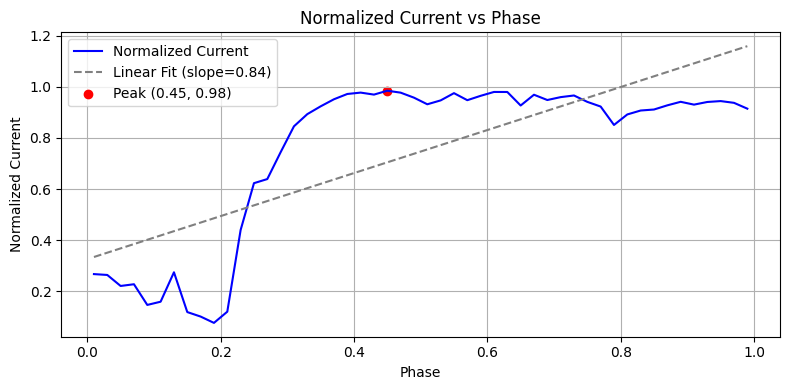

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_normalized_current(df, feature_col='Normalized Current', phase_start=0.01, phase_stop=1.00001, phase_step=0.02):
    """
    Plots the normalized current as a function of phase for one row of a DataFrame.
    
    Parameters:
        df: pd.DataFrame
            Must contain a 'Normalized Current' column with one row of array-like data.
        feature_col: str
            Column name containing the normalized current values.
        phase_start, phase_stop, phase_step: float
            Define the phase array (x-axis).
    """
    # Construct phase array
    phase = np.arange(phase_start, phase_stop, phase_step)

    # Get the normalized current values
    norm_currents = df[feature_col].values.flatten()
    
    # Identify peak
    peak_idx = np.argmax(norm_currents)
    peak_phase = phase[peak_idx]
    peak_amplitude = norm_currents[peak_idx]

    # Fit line
    slope, intercept = np.polyfit(phase, norm_currents, 1)
    linear_fit = slope * phase + intercept

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(phase, norm_currents, label='Normalized Current', color='blue')
    plt.plot(phase, linear_fit, '--', label=f'Linear Fit (slope={slope:.2f})', color='gray')
    plt.scatter(peak_phase, peak_amplitude, color='red', label=f'Peak ({peak_phase:.2f}, {peak_amplitude:.2f})')

    plt.xlabel('Phase')
    plt.ylabel('Normalized Current')
    plt.title('Normalized Current vs Phase')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_normalized_current(testdf)

In [7]:
def bin_rin(rin_value):
    if rin_value < 200:
        return "<200"
    elif rin_value < 400:
        return "200-400"
    else:
        return "400+"
def get_freq_bin(freq):
    if 20 <= freq < 30:
        return "20-30"
    elif 30 <= freq < 40:
        return "30-40"
def group_EI(signal_type):
    if signal_type in ["Inhibitory", "Inhibitory (Rs compensation)"]:
        return "Inhibitory"
   
    elif signal_type in ["Excitatory", "Excitatory (Rs compensation)"]:
        return "Excitatory"
    return signal_type

def group_iSMN(cell_type):
    cell_type = cell_type.strip()
    if cell_type in ["iSMN (dorsal) muscle", "iSMN"]:
        return "iSMN"
    if cell_type == "vSMN":
        return "vSMN"
    return cell_type
cell_types_df = pd.read_csv("/Users/Haley/Desktop/murray-neuroscience-lab/Excel processor/List of cells.csv")
cell_types_df = cell_types_df.dropna(how='all')
cell_types_df = cell_types_df.iloc[:,:4]
cell_types_df.reset_index(drop=True,inplace=True)
def grouprins(cell):
    types = cell_types_df[cell_types_df["Cell"]==cell]

    return types.iloc[0][3]

### Extract excitatory gain, peak timing, and amplitude

In [8]:
def extract_excitatory_features(binned_waveforms):
    """
    Extract excitatory peak gain, peak timing, and peak amplitude for each cell.
    
    Parameters:
        binned_waveforms: dict
            Keys: (freq, signal_type, cell_type, cell_id, Rin)
            Values: DataFrames with waveform data
    
    Returns:
        DataFrame with columns: 
        ['Cell', 'Cell Type', 'Rin', 'Freq', 'Freq Bin', 'Peak Gain', 'Peak Phase', 'Peak Amplitude']
    """
    records = []
    # Assuming phase goes from 0.01 to 1 by 0.02 increments (50 points)
    phase = np.arange(0.01, 1.00001, 0.02)

    for (freq, signal_type, cell_type, cell_id, rin), df in binned_waveforms.items():
        # Check data shape matches expected waveform shape (50 time points x 4 columns)
        if df.shape != (50, 4):
            continue
        #  Excitatory signals only
        if group_EI(signal_type) != 'Excitatory':
            continue

        norm_currents = df['Normalized Current'].values
        peak_idx = np.argmax(norm_currents)
        peak_phase = phase[peak_idx]
        peak_amplitude = norm_currents[peak_idx]  
        slope, intercept = np.polyfit(phase, norm_currents, 1)  # linear fit

        freq_bin = get_freq_bin(freq)

        records.append({
            'Cell': cell_id,
            'Cell Type': group_iSMN(cell_type),
            'Rin': rin,
            'Freq': freq,
            'Freq Bin': freq_bin,
            'Peak Gain': slope,
            'Peak Phase': peak_phase,
            'Peak Amplitude': peak_amplitude
        })

    return pd.DataFrame(records)


In [9]:
def aggregate_features(features_df):
    features_df['Rin group'] = features_df['Cell'].apply(grouprins)

    # Group by Cell Type, Rin Bin, Frequency Bin
    grouped = features_df.groupby(['Cell Type','Freq Bin','Rin group'])
    
    summary = grouped.agg({
        'Peak Gain': ['mean', 'std', 'count'],
        'Peak Phase': ['mean', 'std'],
        'Peak Amplitude': ['mean', 'std']
    })
    
    # Flatten multi-index columns
    summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
    summary = summary.reset_index()
    
    return summary

In [10]:
def aggregate_features_cell(features_df):
    # features_df['Rin group'] = features_df['Cell'].apply(grouprins)
    # Group by Cell Type, Rin Bin, Frequency Bin
    grouped = features_df.groupby(['Cell','Freq Bin'])
    
    summary = grouped.agg({
        'Peak Gain': ['mean', 'std', 'count'],
        'Peak Phase': ['mean', 'std'],
        'Peak Amplitude': ['mean', 'std']
    })
    
    # Flatten multi-index columns
    summary.columns = ['_'.join(col).strip() for col in summary.columns.values]
    summary = summary.reset_index()
    
    return summary



In [11]:
def plot_feature_by_factor(summary_df, feature='Peak Gain_mean', hue='Cell', title=None):
    plt.figure(figsize=(12, 6))

    freq_bins = summary_df['Freq Bin'].unique()
    groups = summary_df[hue].unique()

    x = np.arange(len(freq_bins))  # the label locations
    width = 0.8 / len(groups)  # width of the bars, divided among groups

    for i, group in enumerate(groups):
        group_data = summary_df[summary_df[hue] == group]
        # Align bars by freq bin
        means = [group_data[group_data['Freq Bin'] == fb][feature].values[0] if fb in group_data['Freq Bin'].values else np.nan for fb in freq_bins]
        plt.bar(x + i * width, means, width=width, label=group)

    plt.xticks(x + width * (len(groups) - 1) / 2, freq_bins)
    plt.xlabel('Frequency Bin')
    plt.ylabel(feature)
    plt.title(title or f"{feature} by Frequency Bin and {hue}")
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

def plot_raw_feature_distribution(features_df, feature='Peak Gain', group_by='Cell Type'):
    plt.figure(figsize=(12, 6))

    freq_bins = sorted(features_df['Freq Bin'].unique())
    groups = features_df[group_by].unique()

    positions = []
    data_to_plot = []
    labels = []

    width = 0.8 / len(groups)

    for i, fb in enumerate(freq_bins):
        for j, group in enumerate(groups):
            subset = features_df[(features_df['Freq Bin'] == fb) & (features_df[group_by] == group)][feature].dropna()
            if len(subset) > 0:
                data_to_plot.append(subset)
                pos = i + j * width
                positions.append(pos)
                labels.append(f"{fb}\n{group}")

    bp = plt.boxplot(data_to_plot, positions=positions, widths=width * 0.9, patch_artist=True)

    # Color boxes per group
    colors = plt.cm.tab10.colors
    for patch, label in zip(bp['boxes'], labels):
        group_label = label.split('\n')[1]
        color_idx = list(groups).index(group_label)
        patch.set_facecolor(colors[color_idx])

    plt.xticks(
        ticks=[i + width * (len(groups)-1) / 2 for i in range(len(freq_bins))],
        labels=freq_bins
    )
    plt.xlabel('Frequency Bin')
    plt.ylabel(feature)
    plt.title(f"{feature} Distribution by Frequency Bin and {group_by}")
    plt.tight_layout()
    plt.show()


In [12]:
def variance_explained_manual(features_df, feature_col='Peak Gain'):
    features_df = features_df.copy()
    features_df['Rin Bin'] = features_df['Rin'].apply(bin_rin)

    # Drop NA rows in feature or group columns
    df = features_df.dropna(subset=[feature_col, 'Cell Type', 'Rin Bin'])

    # Overall mean
    grand_mean = df[feature_col].mean()

    # Total Sum of Squares (SST)
    SST = ((df[feature_col] - grand_mean) ** 2).sum()

    # Between-group SS for Cell Type
    ss_cell = sum([
        len(group) * (group[feature_col].mean() - grand_mean) ** 2
        for _, group in df.groupby('Cell Type')
    ])
    df_cell = df['Cell Type'].nunique() - 1

    # Between-group SS for Rin Bin
    ss_rin = sum([
        len(group) * (group[feature_col].mean() - grand_mean) ** 2
        for _, group in df.groupby('Rin Bin')
    ])
    df_rin = df['Rin Bin'].nunique() - 1

    # Residual SS (SSE)
    sse = SST - ss_cell - ss_rin
    df_resid = len(df) - df_cell - df_rin - 1

    # Mean Squares
    ms_cell = ss_cell / df_cell
    ms_rin = ss_rin / df_rin
    ms_resid = sse / df_resid

    # F-values
    f_cell = ms_cell / ms_resid
    f_rin = ms_rin / ms_resid

    # p-values (from F-distribution)
    from scipy.stats import f
    p_cell = f.sf(f_cell, df_cell, df_resid)
    p_rin = f.sf(f_rin, df_rin, df_resid)

    # Variance explained
    var_exp_cell = ss_cell / SST
    var_exp_rin = ss_rin / SST
    var_exp_resid = sse / SST

    results = pd.DataFrame({
        'Source': ['Cell Type', 'Rin Bin', 'Residual'],
        'SS': [ss_cell, ss_rin, sse],
        'DF': [df_cell, df_rin, df_resid],
        'MS': [ms_cell, ms_rin, ms_resid],
        'F': [f_cell, f_rin, np.nan],
        'p-value': [p_cell, p_rin, np.nan],
        'Variance Explained': [var_exp_cell, var_exp_rin, var_exp_resid]
    })

    return results


In [ ]:
# variance_explained_manual(primary, feature_col='Peak Gain')


NameError: name 'primary' is not defined

In [ ]:
ttest_results_celltype2

,Freq Bin,Cell Type_1,Cell Type_2,t_stat,p_value
0,35–45,dVS,vSMN,4.583423,2.594418e-05
1,35–45,dVS,dSMN,1.711631,9.205384e-02
2,35–45,vSMN,dSMN,-3.897175,3.315346e-04
3,25–35,dVS,vSMN,-5.647621,3.135390e-08
4,25–35,dVS,dSMN,-4.927039,1.188609e-06
5,25–35,vSMN,dSMN,2.211973,2.758943e-02
6,15–25,dVS,vSMN,-2.335074,3.708459e-02
7,15–25,dVS,dSMN,1.272413,2.540592e-01
8,15–25,vSMN,dSMN,3.053751,3.529813e-02
9,<15,dVS,vSMN,0.780877,4.430815e-01


In [14]:
def plot_feature_by_factor(summary_df, feature='Peak Gain_mean', hue='Cell', title=None):
    plt.figure(figsize=(12, 6))

    freq_bins = summary_df['Freq Bin'].unique()
    groups = summary_df[hue].unique()

    x = np.arange(len(freq_bins))  # the label locations
    width = 0.8 / len(groups)  # width of the bars, divided among groups

    for i, group in enumerate(groups):
        group_data = summary_df[summary_df[hue] == group]
        # Align bars by freq bin
        means = [group_data[group_data['Freq Bin'] == fb][feature].values[0] if fb in group_data['Freq Bin'].values else np.nan for fb in freq_bins]
        plt.bar(x + i * width, means, width=width, label=group)

    plt.xticks(x + width * (len(groups) - 1) / 2, freq_bins)
    plt.xlabel('Frequency Bin')
    plt.ylabel(feature)
    plt.title(title or f"{feature} by Frequency Bin and {hue}")
    plt.legend(title=hue)
    plt.tight_layout()
    plt.show()

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_83102/2447863932.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return types.iloc[0][3]


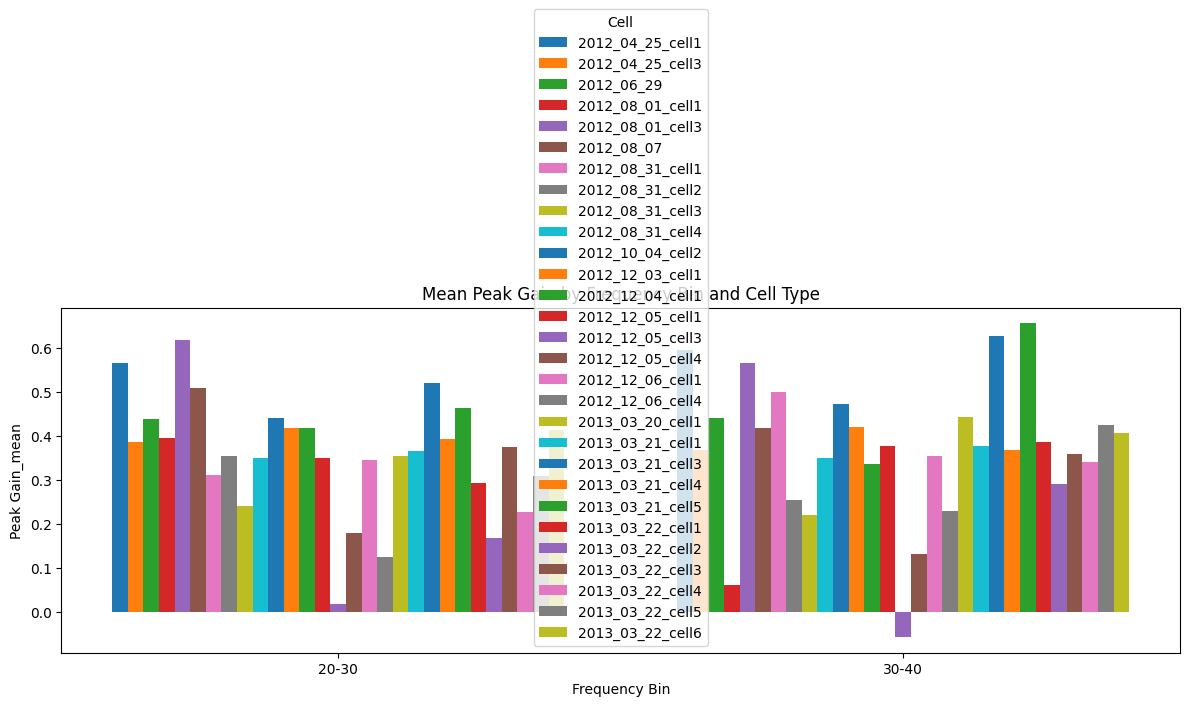

TypeError: '<' not supported between instances of 'NoneType' and 'str'

<Figure size 1200x600 with 0 Axes>

In [15]:
# 1. Extract features
features_df = extract_excitatory_features(binwvsrinNaNs)

# 2. Aggregate by groups
summary_across_celltype = aggregate_features(features_df)
summary_across_cell = aggregate_features_cell(features_df)

# 3a. Plot mean Peak Gain by Cell Type
plot_feature_by_factor(summary_across_cell, feature='Peak Gain_mean', hue='Cell', title="Mean Peak Gain by Frequency Bin and Cell Type")

# 3b. Plot distribution of Peak Gain by Cell Type (raw data)
plot_raw_feature_distribution(features_df, feature='Peak Gain', group_by='Cell Type')
plot_raw_feature_distribution(features_df, feature='Peak Phase', group_by='Cell Type')
plot_raw_feature_distribution(features_df, feature='Peak Phase', group_by='Cell Type')

# 4. Variance explained analysis for Peak Gain
# variance_explained_manual(features_df, feature_col='Peak Gain')

# You can repeat plotting and analysis for 'Peak Phase' and 'Peak Amplitude' similarly


In [16]:
import pandas as pd
from scipy.stats import ttest_ind

def compute_ttests(features_df, feature='Peak Gain', group_col='Cell Type', compare_col='Rin Bin', freq_col='Freq Bin'):
    """
    Compute t-tests for feature values across cell types or Rin bins within each frequency bin.
    
    Parameters:
        features_df: pd.DataFrame
            DataFrame containing columns for the feature, group_col, compare_col, and freq_col.
        feature: str
            The feature column on which to perform t-tests.
        group_col: str
            Column name to group by first (e.g. 'Cell Type' or 'Rin Bin').
        compare_col: str
            Column name for categories to compare via t-tests within each group (e.g. 'Rin Bin' or 'Cell Type').
        freq_col: str
            Column name for swim frequency bins.
    
    Returns:
        pd.DataFrame with columns:
            [freq_col, group_col, compare_col_1, compare_col_2, t_stat, p_value]
    """
    results = []

    freq_bins = features_df[freq_col].unique()
    groups = features_df[group_col].unique()
    
    for freq in freq_bins:
        freq_df = features_df[features_df[freq_col] == freq]
        
        for group in groups:
            subset = freq_df[freq_df[group_col] == group]
            compare_categories = subset[compare_col].unique()
            
            # Compare all pairs within compare_col categories
            for i, cat1 in enumerate(compare_categories):
                for cat2 in compare_categories[i+1:]:
                    data1 = subset[subset[compare_col] == cat1][feature].dropna()
                    data2 = subset[subset[compare_col] == cat2][feature].dropna()
                    
                    if len(data1) > 1 and len(data2) > 1:
                        t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
                        results.append({
                            freq_col: freq,
                            group_col: group,
                            f"{compare_col}_1": cat1,
                            f"{compare_col}_2": cat2,
                            't_stat': t_stat,
                            'p_value': p_value
                        })

    return pd.DataFrame(results)


In [ ]:
features_df

,Cell,Cell Type,Rin,Freq,Freq Bin,Peak Gain,Peak Phase,Peak Amplitude,Rin group
0,2013_03_21_cell5,CaP,33.0,25.233409,20-30,0.840757,0.45,0.984387,primary
1,2013_03_21_cell5,CaP,33.0,32.615786,30-40,0.397429,0.81,0.965093,primary
2,2013_03_21_cell5,CaP,33.0,36.509675,30-40,NaN,0.05,NaN,primary
3,2013_03_21_cell5,CaP,33.0,26.212320,20-30,0.624402,0.65,0.906223,primary
4,2013_03_21_cell5,CaP,33.0,22.836264,20-30,0.500803,0.69,0.875901,primary
...,...,...,...,...,...,...,...,...,...
11738,2012_12_06_cell4,iSMN,861.9,27.472527,20-30,0.135674,0.61,0.742466,High Rin Secondary
11739,2012_12_06_cell4,iSMN,861.9,18.248175,None,0.303183,0.73,0.724504,High Rin Secondary
11740,2012_12_06_cell4,iSMN,861.9,27.909573,20-30,0.195921,0.49,0.699526,High Rin Secondary
11741,2012_12_06_cell4,iSMN,861.9,25.335698,20-30,0.095604,0.73,0.691312,High Rin Secondary


In [17]:
feature_cols = ["Peak Gain","Peak Phase","Peak Amplitude"]

In [18]:
from scipy.stats import f

def hotellings_t2_test(X, Y):
    """
    Perform Hotelling's T-squared test for two multivariate samples.
    
    Parameters:
        X: np.ndarray of shape (n1, p)
        Y: np.ndarray of shape (n2, p)
    
    Returns:
        T2_stat: float
        F_stat: float
        p_value: float
    """
    n1, p = X.shape
    n2, _ = Y.shape

    mean_diff = np.mean(X, axis=0) - np.mean(Y, axis=0)
    S1 = np.cov(X, rowvar=False)
    S2 = np.cov(Y, rowvar=False)
    Sp = ((n1 - 1) * S1 + (n2 - 1) * S2) / (n1 + n2 - 2)
    Sp_inv = np.linalg.pinv(Sp)  

    T2 = (n1 * n2) / (n1 + n2) * mean_diff.T @ Sp_inv @ mean_diff
    F_stat = (n1 + n2 - p - 1) * T2 / ((n1 + n2 - 2) * p)
    df1 = p
    df2 = n1 + n2 - p - 1
    p_value = 1 - f.cdf(F_stat, df1, df2)

    return T2, F_stat, p_value



In [19]:
def compute_hotellings_tests(features_df, feature_cols, group_col='Cell Type', compare_col='Rin Bin', freq_col='Freq Bin'):
    """
    Perform Hotelling's T² tests for multiple features across categories within each group.
    
    Parameters:
        features_df: DataFrame containing the features and grouping columns.
        feature_cols: list of feature names to include in the test.
    
    Returns:
        DataFrame with Hotelling's T² test results across groupings.
    """
    results = []
    freq_bins = features_df[freq_col].dropna().unique()
    groups = features_df[group_col].dropna().unique()

    for freq in freq_bins:
        freq_df = features_df[features_df[freq_col] == freq]

        for group in groups:
            subset = freq_df[freq_df[group_col] == group]
            compare_categories = subset[compare_col].dropna().unique()

            for i, cat1 in enumerate(compare_categories):
                for cat2 in compare_categories[i+1:]:
                    data1 = subset[subset[compare_col] == cat1][feature_cols].dropna()
                    data2 = subset[subset[compare_col] == cat2][feature_cols].dropna()

                    if len(data1) > len(feature_cols) and len(data2) > len(feature_cols):
                        try:
                            T2, F_stat, p_val = hotellings_t2_test(data1.values, data2.values)
                            results.append({
                                freq_col: freq,
                                group_col: group,
                                f"{compare_col}_1": cat1,
                                f"{compare_col}_2": cat2,
                                'T2_stat': T2,
                                'F_stat': F_stat,
                                'p_value': p_val
                            })
                        except Exception as e:
                            print(f"Failed comparison {cat1} vs {cat2} at {freq}, {group}: {e}")
    return pd.DataFrame(results)


In [ ]:
features_df

,Cell,Cell Type,Rin,Freq,Freq Bin,Peak Gain,Peak Phase,Peak Amplitude,Rin group
0,2013_03_21_cell5,CaP,33.0,25.233409,20-30,0.840757,0.45,0.984387,primary
1,2013_03_21_cell5,CaP,33.0,32.615786,30-40,0.397429,0.81,0.965093,primary
2,2013_03_21_cell5,CaP,33.0,36.509675,30-40,NaN,0.05,NaN,primary
3,2013_03_21_cell5,CaP,33.0,26.212320,20-30,0.624402,0.65,0.906223,primary
4,2013_03_21_cell5,CaP,33.0,22.836264,20-30,0.500803,0.69,0.875901,primary
...,...,...,...,...,...,...,...,...,...
11738,2012_12_06_cell4,iSMN,861.9,27.472527,20-30,0.135674,0.61,0.742466,High Rin Secondary
11739,2012_12_06_cell4,iSMN,861.9,18.248175,None,0.303183,0.73,0.724504,High Rin Secondary
11740,2012_12_06_cell4,iSMN,861.9,27.909573,20-30,0.195921,0.49,0.699526,High Rin Secondary
11741,2012_12_06_cell4,iSMN,861.9,25.335698,20-30,0.095604,0.73,0.691312,High Rin Secondary


In [ ]:
T2_freq = hotellings_t2_test(features_df[features_df["Freq Bin"]=="20-30"][feature_cols].dropna(),features_df[features_df["Freq Bin"]=="30-40"][feature_cols].dropna())

In [ ]:
T2_freq

(np.float64(417.38298246056695),
 np.float64(139.09570316294304),
 np.float64(1.1102230246251565e-16))

In [20]:
hotttest_results_acrossrin = compute_hotellings_tests(
    features_df, 
    feature_cols,
    group_col='', 
    compare_col='Rin bin', 
    freq_col='Freq Bin'
)

KeyError: ''

In [22]:
def compute_hotellings_tests_grouped(features_df, feature_cols, compare_col='Rin Bin', freq_col='Freq Bin'):
    """
    Perform Hotelling's T² tests for multiple features across categories within each group.
    
    Parameters:
        features_df: DataFrame containing the features and grouping columns.
        feature_cols: list of feature names to include in the test.
    
    Returns:
        DataFrame with Hotelling's T² test results across groupings.
    """
    results = []
    freq_bins = features_df[freq_col].dropna().unique()

    for freq in freq_bins:
        freq_df = features_df[features_df[freq_col] == freq]
        compare_categories = freq_df[compare_col].dropna().unique()

        for i, cat1 in enumerate(compare_categories):
            for cat2 in compare_categories[i+1:]:
                data1 = freq_df[freq_df[compare_col] == cat1][feature_cols].dropna()
                data2 = freq_df[freq_df[compare_col] == cat2][feature_cols].dropna()

                if len(data1) > len(feature_cols) and len(data2) > len(feature_cols):
                    try:
                        T2, F_stat, p_val = hotellings_t2_test(data1.values, data2.values)
                        results.append({
                            freq_col: freq,
                            f"{compare_col}_1": cat1,
                            f"{compare_col}_2": cat2,
                            'T2_stat': T2,
                            'F_stat': F_stat,
                            'p_value': p_val
                        })
                    except Exception as e:
                            print(f"Failed comparison {cat1} vs {cat2} at {freq},: {e}")
    return pd.DataFrame(results)


In [ ]:
hotttest_results_acrossrin

,Freq Bin,Cell Type,Rin_1,Rin_2,T2_stat,F_stat,p_value
0,20-30,CaP,33.00,43.64,446.976463,148.661061,1.110223e-16
1,20-30,CaP,33.00,51.00,253.095329,83.996703,1.110223e-16
2,20-30,CaP,33.00,69.00,4.101889,1.346098,2.624399e-01
3,20-30,CaP,43.64,51.00,134.802972,44.854084,1.110223e-16
4,20-30,CaP,43.64,69.00,26.952370,8.961407,7.665615e-06
...,...,...,...,...,...,...,...
107,30-40,vSMN,440.84,815.69,183.845329,60.773214,1.110223e-16
108,30-40,dSMN,242.57,264.97,22.977266,7.584000,7.854397e-05
109,30-40,dSMN,242.57,340.01,129.108458,42.693235,1.110223e-16
110,30-40,dSMN,264.97,340.01,30.533266,10.094672,2.719559e-06


In [23]:
hotttest_results_between = compute_hotellings_tests_grouped(
    features_df, 
    feature_cols,
    compare_col='Rin group', 
    freq_col='Freq Bin'
)


In [24]:
hotttest_results_between

,Freq Bin,Rin group_1,Rin group_2,T2_stat,F_stat,p_value
0,20-30,primary,Low Rin Secondary,65.115514,21.695399,6.050715e-14
1,20-30,primary,High Rin Secondary,1172.869161,390.819305,1.110223e-16
2,20-30,Low Rin Secondary,High Rin Secondary,735.590100,244.978747,1.110223e-16
3,30-40,primary,Low Rin Secondary,28.598069,9.522378,3.057634e-06
4,30-40,primary,High Rin Secondary,170.426029,56.751953,1.110223e-16
5,30-40,Low Rin Secondary,High Rin Secondary,253.721210,84.427668,1.110223e-16


In [ ]:
hotttest_results_between.to_csv("hott_Brin",index=False)

In [ ]:
hotttest_results = compute_hotellings_tests(
    features_df, 
    feature_cols,
    group_col='Rin group', 
    compare_col='Cell Type', 
    freq_col='Freq Bin'
)


In [ ]:
hotttest_results_between

,Freq Bin,Rin group_1,Rin group_2,T2_stat,F_stat,p_value
0,20-30,primary,Low Rin Secondary,65.115514,21.695399,6.050715e-14
1,20-30,primary,High Rin Secondary,1172.869161,390.819305,1.110223e-16
2,20-30,Low Rin Secondary,High Rin Secondary,735.590100,244.978747,1.110223e-16
3,30-40,primary,Low Rin Secondary,28.598069,9.522378,3.057634e-06
4,30-40,primary,High Rin Secondary,170.426029,56.751953,1.110223e-16
5,30-40,Low Rin Secondary,High Rin Secondary,253.721210,84.427668,1.110223e-16


In [ ]:
results_df.iloc[0]

Freq Bin                    20-30
Rin group_1               primary
Rin group_2    Low Rin Secondary 
T2_stat                 65.115514
F_stat                  21.695399
p_value                       0.0
Name: 0, dtype: object

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29566/1250212342.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


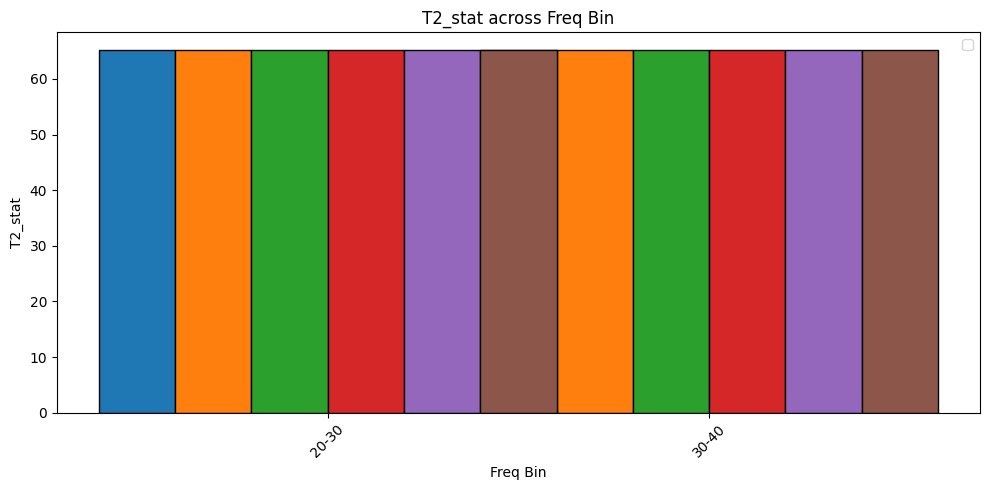

In [ ]:
results_df=hotttest_results_between
stat_col = "T2_stat"
freq_col="Freq Bin"
unique_groups = 6
freq_bins = sorted(results_df[freq_col].dropna().unique(), key=str)

plt.figure(figsize=figsize)

x = np.arange(len(freq_bins))  # Base x positions for each freq_bin

for i in range(unique_groups):
    subset = results_df.iloc[0]
    stats = []
    for fb in freq_bins:
        stat = subset[stat_col]
        stats.append(stat)  
    
    offset = (i - unique_groups / 2) * bar_width + bar_width / 2
    plt.bar(x + offset, stats, width=bar_width, edgecolor='black')

plt.xticks(ticks=x, labels=freq_bins, rotation=45)
plt.xlabel(freq_col)
plt.ylabel(stat_col)
plt.title(f"{stat_col} across {freq_col}")
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
hotttest_results.to_csv("hott_NrinBcell",index=False)

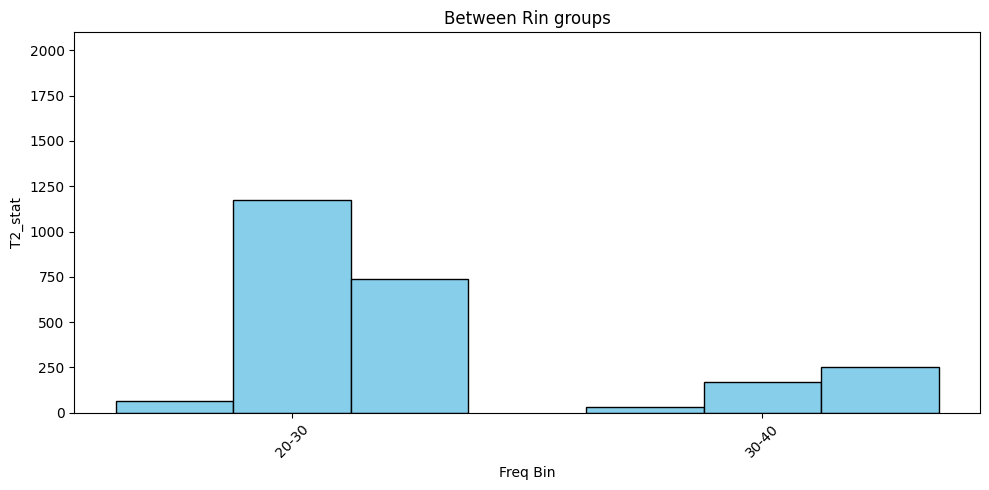

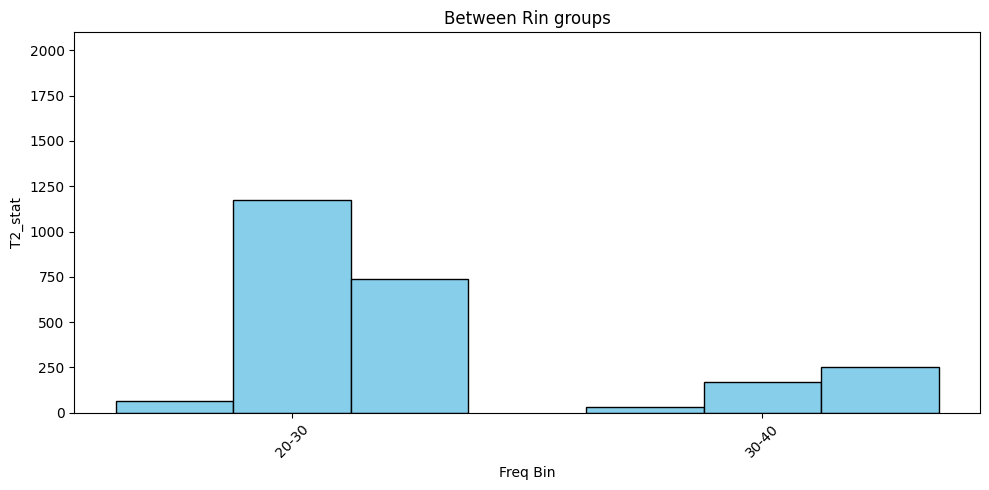

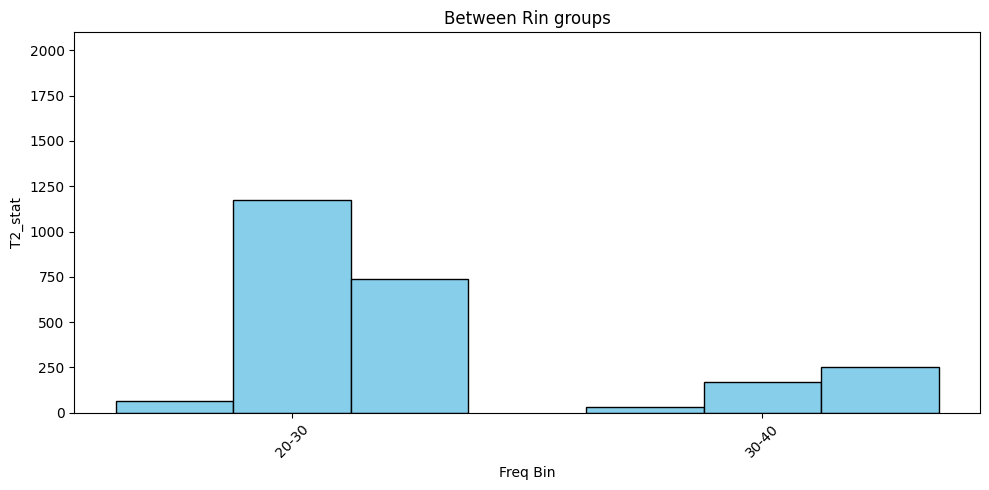

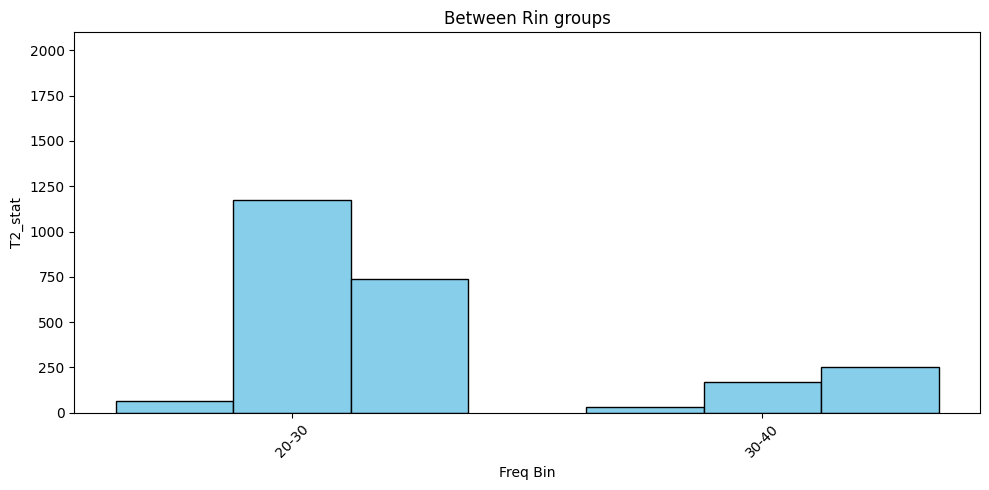

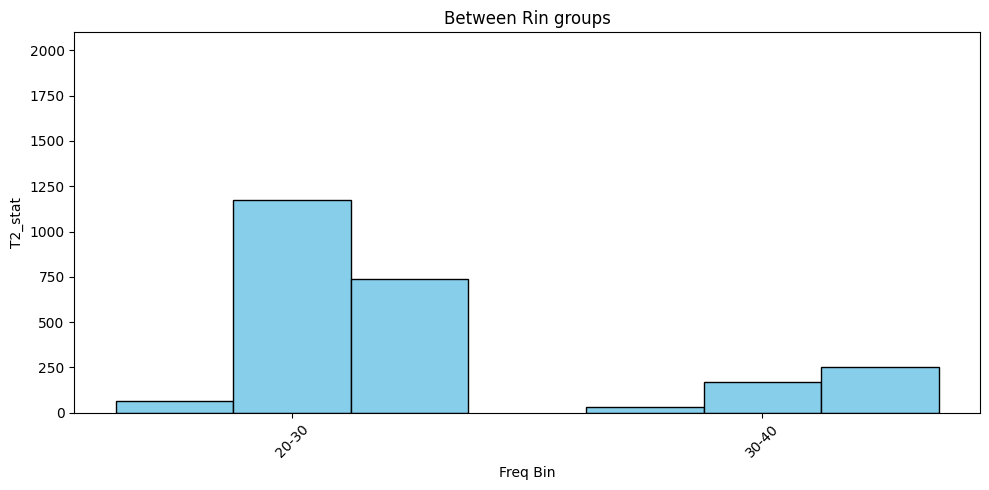

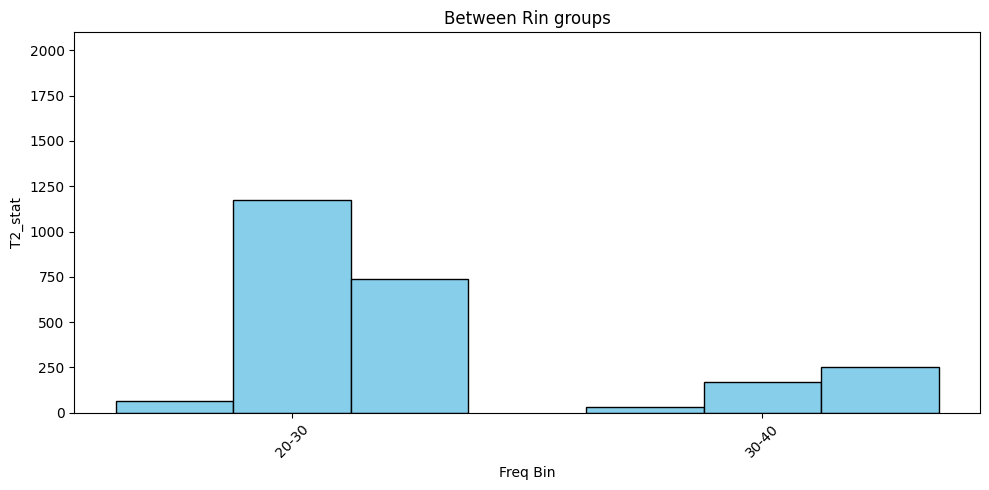

In [ ]:
results_df=hotttest_results_between
stat_col = "T2_stat"
freq_col="Freq Bin"
figsize=(10, 5)
bar_width=0.2
unique_groups = 6

freq_bins = sorted(results_df[freq_col].dropna().unique(), key=str)

for group in range(unique_groups):
    subset = results_df
    
    # Count how many bars per bin to offset properly
    counts_per_bin = {fb: len(subset[subset[freq_col] == fb]) for fb in freq_bins}
    # print(counts_per_bin)
    max_count = max(counts_per_bin.values())
    # print(max_count)
    plt.figure(figsize=figsize)
    x_ticks = []
    x_labels = []

    idx = 0
    for i, fb in enumerate(freq_bins):
        bin_subset = subset[subset[freq_col] == fb]
        # print(bin_subset)
        stats = bin_subset[stat_col].values
        # print(stats)
        x = np.arange(len(stats)) * bar_width + i * (max_count + 1) * bar_width
        # print(x)
        plt.bar(x, stats, width=bar_width, color='skyblue', edgecolor='black')

        # Save tick positions and labels
        center_x = x.mean() if len(x) > 0 else i
        x_ticks.append(center_x)
        x_labels.append(fb)

        idx += 1
    plt.ylim([0, 2100])

    plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45)
    plt.xlabel(freq_col)
    plt.ylabel(stat_col)
    plt.title("Between Rin groups")
    plt.tight_layout()
    plt.show()

In [ ]:
group_col='Rin group'

results_df = hotttest_results
freq_col='Freq Bin'
stat_col='T2_stat'
title_prefix="Stat Distribution"
figsize=(10, 5)
bar_width=0.2
title_prefix="Stat Distribution"

In [ ]:
bin_subset[stat_col].values

array([ 28.5981, 170.426 , 253.7212])

In [ ]:
bin_subset

,Freq Bin,Rin group,Cell Type_1,Cell Type_2,T2_stat,F_stat,p_value
10,30-40,primary,CaP,vRoP,249.044719,82.797305,1.110223e-16
11,30-40,primary,CaP,MiP,90.150603,29.945679,1.110223e-16
12,30-40,primary,CaP,dRoP,277.833858,92.043119,1.110223e-16
13,30-40,primary,vRoP,MiP,51.878550,17.258876,6.174916e-11
14,30-40,primary,vRoP,dRoP,37.468151,12.456902,5.834602e-08
15,30-40,primary,MiP,dRoP,50.295157,16.707341,2.016385e-10


In [ ]:
bar_width

0.2

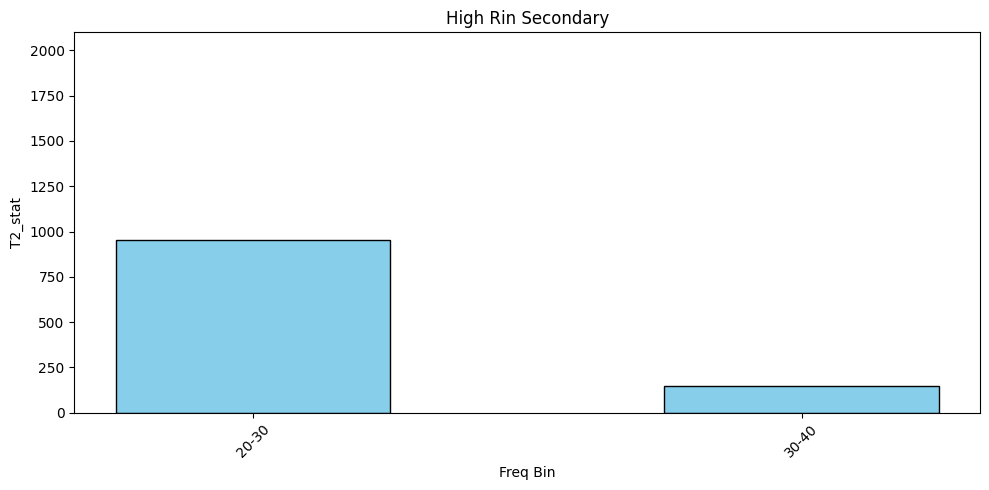

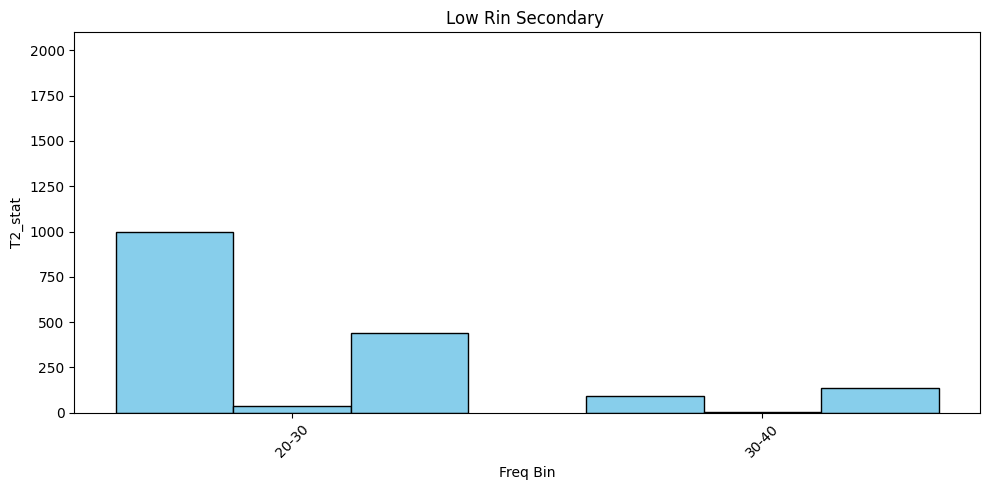

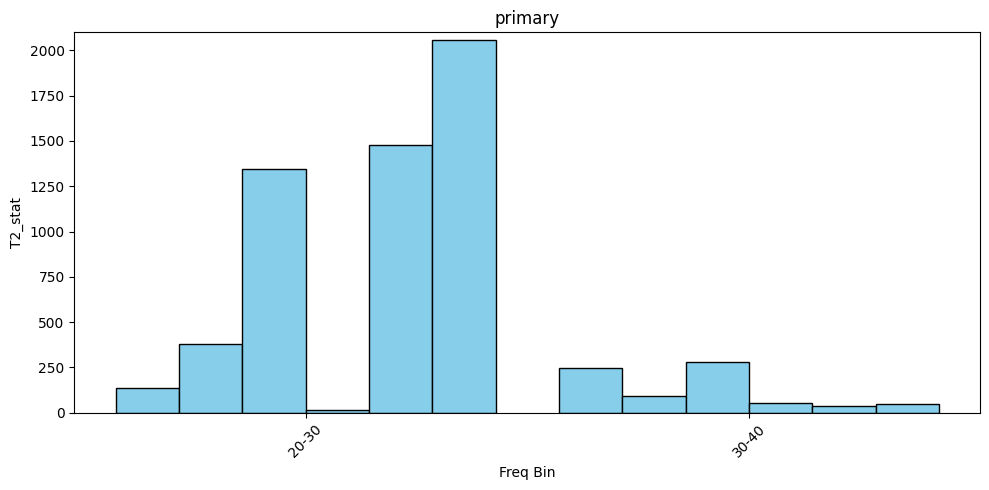

In [ ]:
unique_groups = sorted(results_df[group_col].dropna().unique())
freq_bins = sorted(results_df[freq_col].dropna().unique(), key=str)

for group in unique_groups:
    subset = results_df[results_df[group_col] == group]
    
    # Count how many bars per bin to offset properly
    counts_per_bin = {fb: len(subset[subset[freq_col] == fb]) for fb in freq_bins}
    # print(counts_per_bin)
    max_count = max(counts_per_bin.values())
    # print(max_count)
    plt.figure(figsize=figsize)
    x_ticks = []
    x_labels = []

    idx = 0
    for i, fb in enumerate(freq_bins):
        bin_subset = subset[subset[freq_col] == fb]
        # print(bin_subset)
        stats = bin_subset[stat_col].values
        # print(stats)
        x = np.arange(len(stats)) * bar_width + i * (max_count + 1) * bar_width
        # print(x)
        plt.bar(x, stats, width=bar_width, color='skyblue', edgecolor='black')

        # Save tick positions and labels
        center_x = x.mean() if len(x) > 0 else i
        x_ticks.append(center_x)
        x_labels.append(fb)

        idx += 1
    plt.ylim([0, 2100])

    plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45)
    plt.xlabel(freq_col)
    plt.ylabel(stat_col)
    plt.title(f"{group}")
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_grouped_stat_bars(
    results_df,
    group_col='Cell Type',
    freq_col='Freq Bin',
    stat_col='t_stat',
    log_scale_pval=True,
    figsize=(10, 5),
    bar_width=0.2,
    title_prefix="Stat Distribution"
):
    """
    Plot individual bars of stat_col values for each freq_bin in separate plots by group_col.
    Can log-transform p-values for better visibility.
    
    Parameters:
        results_df: pd.DataFrame with group_col, freq_col, and stat_col.
        group_col: str — column to group into separate subplots.
        freq_col: str — frequency bin for x-axis grouping.
        stat_col: str — statistic to plot (e.g. t_stat, p_value).
        log_scale_pval: bool — whether to plot -log10(p_value) instead of raw.
        figsize: tuple — size of each plot.
        bar_width: float — width of each bar.
        title_prefix: str — prefix for plot title.
    """
    unique_groups = sorted(results_df[group_col].dropna().unique())
    freq_bins = sorted(results_df[freq_col].dropna().unique(), key=str)

    for group in unique_groups:
        subset = results_df[results_df[group_col] == group]
        
        plt.figure(figsize=figsize)
        x_ticks = []
        x_labels = []
        x_positions = []

        idx = 0
        for i, fb in enumerate(freq_bins):
            bin_subset = subset[subset[freq_col] == fb]

            if log_scale_pval and stat_col == 'p_value':
                stats = -np.log10(bin_subset[stat_col].replace(0, np.nextafter(0, 1)))
                ylabel = "-log10(p-value)"
            else:
                stats = bin_subset[stat_col].values
                ylabel = stat_col

            x = np.arange(len(stats)) * bar_width + i * 2 * bar_width

            bars = plt.bar(x, stats, width=bar_width, color='skyblue', edgecolor='black')

            if stat_col == 'p_value' and not log_scale_pval:
                for bar, val in zip(bars, bin_subset[stat_col]):
                    plt.text(
                        bar.get_x() + bar.get_width() / 2,
                        bar.get_height(),
                        f"{val:.1e}",
                        ha='center', va='bottom', fontsize=8, rotation=90
                    )

            center_x = x.mean() if len(x) > 0 else i
            x_ticks.append(center_x)
            x_labels.append(fb)
            x_positions.extend(x)

            idx += 1

        plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45)
        plt.xlabel(freq_col)
        plt.ylabel(ylabel)
        plt.title(f"{title_prefix} for {group_col}: {group}")
        plt.tight_layout()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_stat_bars(
    results_df,
    group_col='Cell Type',
    freq_col='Freq Bin',
    stat_col='t_stat',
    figsize=(10, 5),
    bar_width=0.2,
    title_prefix="Stat Distribution"
):
    """
    Plot individual bars of stat_col values for each freq_bin in separate plots by group_col.
    
    Parameters:
        results_df: pd.DataFrame with group_col, freq_col, and stat_col.
        group_col: str — column to group into separate subplots.
        freq_col: str — frequency bin for x-axis grouping.
        stat_col: str — statistic to plot (e.g. t_stat, p_value).
        figsize: tuple — size of each plot.
        bar_width: float — width of each bar.
        title_prefix: str — prefix for plot title.
    """
    unique_groups = sorted(results_df[group_col].dropna().unique())
    freq_bins = sorted(results_df[freq_col].dropna().unique(), key=str)

    for group in unique_groups:
        subset = results_df[results_df[group_col] == group]
        
        # Count how many bars per bin to offset properly
        counts_per_bin = {fb: len(subset[subset[freq_col] == fb]) for fb in freq_bins}
        max_count = max(counts_per_bin.values())
        
        plt.figure(figsize=figsize)
        x_ticks = []
        x_labels = []

        idx = 0
        for i, fb in enumerate(freq_bins):
            bin_subset = subset[subset[freq_col] == fb]
            stats = bin_subset[stat_col].values
            x = np.arange(len(stats)) * bar_width + i * (max_count + 1) * bar_width

            plt.bar(x, stats, width=bar_width, color='skyblue', edgecolor='black')

            # Save tick positions and labels
            center_x = x.mean() if len(x) > 0 else i
            x_ticks.append(center_x)
            x_labels.append(fb)

            idx += 1

        plt.xticks(ticks=x_ticks, labels=x_labels, rotation=45)
        plt.xlabel(freq_col)
        plt.ylabel(stat_col)
        plt.title(f"{title_prefix} for {group_col}: {group}")
        plt.tight_layout()
        plt.show()


In [ ]:
primary = features_df[features_df["Rin group"]=="primary"]
Hsecondary = features_df[features_df["Rin group"]=="High Rin Secondary"]
Lsecondary = features_df[features_df["Rin group"]=="Low Rin Secondary "]
primary

,Cell,Cell Type,Rin,Freq,Freq Bin,Peak Gain,Peak Phase,Peak Amplitude,Rin Bin,Rin group
0,2013_03_21_cell5,CaP,33.0,25.233409,20-30,0.840757,0.45,0.984387,<200,primary
1,2013_03_21_cell5,CaP,33.0,32.615786,30-40,0.397429,0.81,0.965093,<200,primary
2,2013_03_21_cell5,CaP,33.0,36.509675,30-40,NaN,0.05,NaN,<200,primary
3,2013_03_21_cell5,CaP,33.0,26.212320,20-30,0.624402,0.65,0.906223,<200,primary
4,2013_03_21_cell5,CaP,33.0,22.836264,20-30,0.500803,0.69,0.875901,<200,primary
...,...,...,...,...,...,...,...,...,...,...
8459,2013_03_22_cell4,dRoP,114.0,1.923410,None,0.306263,0.59,0.647140,<200,primary
8460,2013_03_22_cell4,dRoP,114.0,27.964206,20-30,0.099985,0.73,0.647917,<200,primary
8461,2013_03_22_cell4,dRoP,114.0,26.773762,20-30,0.245725,0.85,0.637838,<200,primary
8462,2013_03_22_cell4,dRoP,114.0,27.855153,20-30,0.246991,0.89,0.650508,<200,primary


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_raw_feature_distribution(features_df, feature='Peak Gain', group_by='Cell Type'):
    plt.figure(figsize=(12, 6))

    freq_bins = sorted(features_df['Freq Bin'].unique())


    groups = sorted(features_df[group_by].unique())
    # if group_by == "Rin":
    #     min_val = np.min(groups)
    #     max_val = np.max(groups)
        # groups = np.array([min_val, max_val])
    positions = []
    data_to_plot = []
    labels = []

    width = 0.8 / len(groups)
    colors = plt.cm.tab10.colors
    color_map = {group: colors[i % len(colors)] for i, group in enumerate(groups)}

    for i, fb in enumerate(freq_bins):
        for j, group in enumerate(groups):
            subset = features_df[
                (features_df['Freq Bin'] == fb) & (features_df[group_by] == group)
            ][feature].dropna()
            if len(subset) > 0:
                data_to_plot.append(subset)
                pos = i + j * width
                positions.append(pos)
                labels.append(f"{fb}\n{group}")

    bp = plt.boxplot(data_to_plot, positions=positions, widths=width * 0.9, patch_artist=True)


    # Create legend handles using string labels
    # legend_handles = [
        # mpatches.Patch(color=color_map[str(group)], label=str(group)) for group in groups
    # ]

    # plt.legend(handles=legend_handles, title=group_by, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Set x-axis ticks (unchanged)
    plt.xticks(
        ticks=[i + width * (len(groups) - 1) / 2 for i in range(len(freq_bins))],
        labels=freq_bins
    )
    plt.xlabel('Frequency Bin')
    plt.ylabel(feature)
    plt.title(f"{feature} Distribution by Frequency Bin and {group_by}")
    plt.tight_layout()
    plt.show()


In [ ]:
features_df

,Cell,Cell Type,Rin,Freq,Freq Bin,Peak Gain,Peak Phase,Peak Amplitude,Rin group
0,2013_03_21_cell5,CaP,33.0,25.233409,20-30,0.840757,0.45,0.984387,primary
1,2013_03_21_cell5,CaP,33.0,32.615786,30-40,0.397429,0.81,0.965093,primary
2,2013_03_21_cell5,CaP,33.0,36.509675,30-40,NaN,0.05,NaN,primary
3,2013_03_21_cell5,CaP,33.0,26.212320,20-30,0.624402,0.65,0.906223,primary
4,2013_03_21_cell5,CaP,33.0,22.836264,20-30,0.500803,0.69,0.875901,primary
...,...,...,...,...,...,...,...,...,...
11738,2012_12_06_cell4,iSMN,861.9,27.472527,20-30,0.135674,0.61,0.742466,High Rin Secondary
11739,2012_12_06_cell4,iSMN,861.9,18.248175,None,0.303183,0.73,0.724504,High Rin Secondary
11740,2012_12_06_cell4,iSMN,861.9,27.909573,20-30,0.195921,0.49,0.699526,High Rin Secondary
11741,2012_12_06_cell4,iSMN,861.9,25.335698,20-30,0.095604,0.73,0.691312,High Rin Secondary


In [ ]:
plot_raw_feature_distribution(features_df, feature='Peak Gain', group_by='Cell Type')
plot_raw_feature_distribution(primary, feature='Peak Phase', group_by='Rin')
plot_raw_feature_distribution(primary, feature='Peak Amplitude', group_by='Rin')

TypeError: '<' not supported between instances of 'NoneType' and 'str'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plot_raw_feature_distribution(primary, feature='Peak Gain', group_by='Rin')
plot_raw_feature_distribution(primary, feature='Peak Phase', group_by='Rin')
plot_raw_feature_distribution(primary, feature='Peak Amplitude', group_by='Rin')

TypeError: '<' not supported between instances of 'NoneType' and 'str'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plot_raw_feature_distribution(Lsecondary, feature='Peak Gain', group_by='Rin')
plot_raw_feature_distribution(Lsecondary, feature='Peak Phase', group_by='Rin')
plot_raw_feature_distribution(Lsecondary, feature='Peak Amplitude', group_by='Rin')

TypeError: '<' not supported between instances of 'str' and 'NoneType'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plot_raw_feature_distribution(Hsecondary, feature='Peak Gain', group_by='Cell Type')
plot_raw_feature_distribution(Hsecondary, feature='Peak Phase', group_by='Cell Type')
plot_raw_feature_distribution(Hsecondary, feature='Peak Amplitude', group_by='Cell Type')

TypeError: '<' not supported between instances of 'NoneType' and 'str'

<Figure size 1200x600 with 0 Axes>

In [ ]:

plot_raw_feature_distribution(Lsecondary, feature='Peak Gain', group_by='Cell Type')
plot_raw_feature_distribution(Lsecondary, feature='Peak Phase', group_by='Cell Type')
plot_raw_feature_distribution(Lsecondary, feature='Peak Amplitude', group_by='Cell Type')

TypeError: '<' not supported between instances of 'str' and 'NoneType'

<Figure size 1200x600 with 0 Axes>

In [ ]:
grouprins("2013_03_22_cell5")

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29566/4166090346.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return types.iloc[0][3]


'Low Rin Secondary '

In [ ]:

plot_raw_feature_distribution(Hsecondary, feature='Peak Gain', group_by='Cell Type')
plot_raw_feature_distribution(Hsecondary, feature='Peak Phase', group_by='Cell Type')
plot_raw_feature_distribution(Hsecondary, feature='Peak Amplitude', group_by='Cell Type')

TypeError: '<' not supported between instances of 'NoneType' and 'str'

<Figure size 1200x600 with 0 Axes>

In [ ]:
grouprins("2013_03_22_cell5")

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29566/4166090346.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return types.iloc[0][3]


'Low Rin Secondary '

In [ ]:
from scipy.stats import ttest_ind

def extract_statistic(df, celltype, freq, feature='Peak Gain', rin_col='Rin Bin'):
    """
    Compute a t-test for the given cell type and frequency bin comparing the feature across Rin groups.

    Parameters:
        df: pd.DataFrame
        celltype: str - the Cell Type to filter
        freq: str or float - the Freq Bin to filter
        feature: str - the feature column to compare
        rin_col: str - the column representing Rin grouping (e.g., 'High Rin', 'Low Rin')

    Returns:
        dict with t_stat, p_value, means, sample sizes
    """
    subset = df[(df["Cell Type"] == celltype) & (df["Freq Bin"] == freq)]
    groups = subset[rin_col].unique()

    if len(groups) != 2:
        return {'error': 'Need exactly 2 Rin groups to compare.'}

    data1 = subset[subset[rin_col] == groups[0]][feature].dropna()
    data2 = subset[subset[rin_col] == groups[1]][feature].dropna()

    if len(data1) < 2 or len(data2) < 2:
        return {'error': 'Insufficient data in one or both groups.'}

    t_stat, p_val = ttest_ind(data1, data2, equal_var=False)

    return {
        'Cell Type': celltype,
        'Freq Bin': freq,
        'Group 1': groups[0],
        'Group 2': groups[1],
        'Mean 1': data1.mean(),
        'Mean 2': data2.mean(),
        'N1': len(data1),
        'N2': len(data2),
        't_stat': t_stat,
        'p_value': p_val
    }
result = extract_statistic(primary, celltype='iSMN',freq='Low')
print(result)


{'error': 'Need exactly 2 Rin groups to compare.'}


In [ ]:
result

{'error': 'Need exactly 2 Rin groups to compare.'}

In [ ]:
ttest_results_celltype

""


In [ ]:

def plot_ttest_heatmap_matplotlib(ttest_df, freq_col='Freq Bin', group_col='Cell Type', 
                                  compare_col1='Rin Bin_1', compare_col2='Rin Bin_2', 
                                  value_col='p_value_corrected', alpha=0.05, title=None):
    """
    Plot heatmaps of Bonferroni-corrected p-values across frequency bins and group pairs
    using matplotlib only.
    
    Parameters:
        ttest_df: pd.DataFrame
            DataFrame with columns [freq_col, group_col, compare_col1, compare_col2, p_value_corrected, significant].
        freq_col: str
            Column name for frequency bins.
        group_col: str
            Column name for grouping (e.g., Cell Type or Rin Bin).
        compare_col1, compare_col2: str
            Column names for the two groups being compared.
        value_col: str
            Column name of the p-values to plot.
        alpha: float
            Significance level threshold for masking and annotation.
        title: str
            Title for the plot.
    """
    unique_freqs = sorted(ttest_df[freq_col].unique())
    unique_groups = sorted(ttest_df[group_col].unique())
    
    for group in unique_groups:
        subset = ttest_df[ttest_df[group_col] == group]
        
        for freq in unique_freqs:
            freq_data = subset[subset[freq_col] == freq]
            
            # Find all unique groups for the matrix
            all_groups = np.unique(freq_data[[compare_col1, compare_col2]].values)
            all_groups = sorted(all_groups)
            size = len(all_groups)
            
            # Initialize matrix with NaNs
            matrix = np.full((size, size), np.nan)
            
            # Map group names to indices
            idx_map = {g: i for i, g in enumerate(all_groups)}
            
            for _, row in freq_data.iterrows():
                i = idx_map[row[compare_col1]]
                j = idx_map[row[compare_col2]]
                matrix[i, j] = row[value_col]
                matrix[j, i] = row[value_col]  # symmetric
            
            fig, ax = plt.subplots(figsize=(8, 6))
            
            # Mask values above alpha (non-significant)
            masked_matrix = np.ma.masked_where((matrix >= alpha) | np.isnan(matrix), matrix)
            
            # Create colormap: use reversed coolwarm (red for low p-values)
            cmap = plt.cm.coolwarm_r
            
            cax = ax.imshow(masked_matrix, interpolation='nearest', cmap=cmap, vmin=0, vmax=alpha)
            
            # Add colorbar
            cbar = fig.colorbar(cax, ax=ax)
            cbar.set_label('Bonferroni-corrected p-value')
            
            # Set ticks and labels
            ax.set_xticks(np.arange(size))
            ax.set_yticks(np.arange(size))
            ax.set_xticklabels(all_groups, rotation=45, ha='right')
            ax.set_yticklabels(all_groups)
            
            # Annotate significant values
            for i in range(size):
                for j in range(size):
                    val = matrix[i, j]
                    if not np.isnan(val) and val < alpha:
                        ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=8)
            
            ax.set_title(f"{title or 'T-test p-values'}\n{group_col}: {group}, Frequency Bin: {freq}")
            ax.set_xlabel(compare_col2)
            ax.set_ylabel(compare_col1)
            plt.tight_layout()
            plt.show()


In [ ]:
def bonferroni_correction(df, alpha=0.05):
    """
    Apply Bonferroni correction to p-values in the DataFrame.
    
    Parameters:
        df: pd.DataFrame
            Must contain a 'p_value' column.
        alpha: float
            Desired significance level.
    
    Returns:
        df with new columns 'p_value_corrected' and 'significant' (bool)
    """
    n_tests = len(df)
    corrected_alpha = alpha / n_tests
    df = df.copy()
    df['p_value_corrected'] = df['p_value'] * n_tests
    df['p_value_corrected'] = df['p_value_corrected'].clip(upper=1.0)  # max 1
    df['significant'] = df['p_value_corrected'] < alpha
    return df, corrected_alpha

In [ ]:
primary

,Cell,Cell Type,Rin,Freq,Freq Bin,Peak Gain,Peak Phase,Peak Amplitude,Rin Bin,Rin group
0,2013_03_21_cell5,CaP,33.0,25.233409,20-30,0.840757,0.45,0.984387,<200,primary
1,2013_03_21_cell5,CaP,33.0,32.615786,30-40,0.397429,0.81,0.965093,<200,primary
2,2013_03_21_cell5,CaP,33.0,36.509675,30-40,NaN,0.05,NaN,<200,primary
3,2013_03_21_cell5,CaP,33.0,26.212320,20-30,0.624402,0.65,0.906223,<200,primary
4,2013_03_21_cell5,CaP,33.0,22.836264,20-30,0.500803,0.69,0.875901,<200,primary
...,...,...,...,...,...,...,...,...,...,...
8459,2013_03_22_cell4,dRoP,114.0,1.923410,None,0.306263,0.59,0.647140,<200,primary
8460,2013_03_22_cell4,dRoP,114.0,27.964206,20-30,0.099985,0.73,0.647917,<200,primary
8461,2013_03_22_cell4,dRoP,114.0,26.773762,20-30,0.245725,0.85,0.637838,<200,primary
8462,2013_03_22_cell4,dRoP,114.0,27.855153,20-30,0.246991,0.89,0.650508,<200,primary


In [ ]:
def bonferroni_correction(df, alpha=0.05):
    """
    Apply Bonferroni correction to p-values in the DataFrame.
    
    Parameters:
        df: pd.DataFrame
            Must contain a 'p_value' column.
        alpha: float
            Desired significance level.
    
    Returns:
        df with new columns 'p_value_corrected' and 'significant' (bool)
    """
    n_tests = len(df)
    corrected_alpha = alpha / n_tests
    df = df.copy()
    df['p_value_corrected'] = df['p_value'] * n_tests
    df['p_value_corrected'] = df['p_value_corrected'].clip(upper=1.0)  # max 1
    df['significant'] = df['p_value_corrected'] < alpha
    return df, corrected_alpha

In [ ]:
   
def ttester(feature):
    ttest_results_celltype1 = compute_ttests(
        primary, 
        feature, 
        # group_col='Freq Bin', 
        compare_col='Cell Type', 
        freq_col='Freq Bin'
    )
    ttest_results_celltype2 = compute_ttests(
        Lsecondary, 
        feature, 
        # group_col='Freq Bin', 
        compare_col='Cell Type', 
        freq_col='Freq Bin'
    )
    ttest_results_celltype3 = compute_ttests(
        Hsecondary, 
        feature, 
        # group_col='Freq Bin', 
        compare_col='Cell Type', 
        freq_col='Freq Bin'
    )
    ttest_results= pd.concat([ttest_results_celltype1,ttest_results_celltype2,ttest_results_celltype3],ignore_index=False)

    corrected_df, corrected_alph = bonferroni_correction(ttest_results)
    return corrected_df, corrected_alph
# corrected_df.to_csv("phasetst")

In [ ]:
   
def ttester(feature = "Peak "):
    ttest_results_celltype1 = compute_ttests(
        primary, 
        feature, 
        group_col='Freq Bin', 
        compare_col='Cell Type', 
        freq_col='Freq Bin'
    )
    ttest_results_celltype2 = compute_ttests(
        Lsecondary, 
        feature, 
        group_col='Freq Bin', 
        compare_col='Cell Type', 
        freq_col='Freq Bin'
    )
    ttest_results_celltype3 = compute_ttests(
        Hsecondary, 
        feature, 
        group_col='Freq Bin', 
        compare_col='Cell Type', 
        freq_col='Freq Bin'
    )
    ttest_results= pd.concat([ttest_results_celltype1,ttest_results_celltype2,ttest_results_celltype3],ignore_index=False)

    corrected_df, corrected_alph = bonferroni_correction(ttest_results,0.001)
    return corrected_df, corrected_alph
# corrected_df.to_csv("phasetst")

In [ ]:
phase, corrected_alph = ttester("Peak Phase")
amp, corrected_alph= ttester("Peak Amplitude")
gain, corrected_alph=ttester("Peak Gain")
num_significant(phase)
num_significant(amp)
num_significant(gain)


primary slow: 0.3333333333333333
primary fast: 0.16666666666666666
low rin secondary slow: 0.6666666666666666
low rin secondary fast: 0.6666666666666666
high rin slow: 1
high rin fast: 0
primary slow: 0.5
primary fast: 1.0
low rin secondary slow: 0.6666666666666666
low rin secondary fast: 0.6666666666666666
high rin slow: 1
high rin fast: 1
primary slow: 0.5
primary fast: 0.3333333333333333
low rin secondary slow: 0.0
low rin secondary fast: 0.3333333333333333
high rin slow: 1
high rin fast: 1


In [ ]:
corrected_alph

5e-05

In [ ]:
def num_significant(corrected_df):
    print("primary slow:",sum(corrected_df.iloc[0:5,6])/6)
    print("primary fast:",sum(corrected_df.iloc[5:12,6])/6)
    print("low rin secondary slow:",sum(corrected_df.iloc[12:15,6])/3)
    print("low rin secondary fast:",sum(corrected_df.iloc[15:18,6])/3)
    print("high rin slow:",sum(corrected_df.iloc[18:19,6]))
    print("high rin fast:",sum(corrected_df.iloc[19:,6]))



In [ ]:

def summarize_significance(*dfs, sig_col='significant'):
    """
    Combine multiple dataframes and summarize number of significant results.

    Parameters:
        *dfs: DataFrames to combine
        sig_col: name of column indicating significance (boolean or 0/1)

    Returns:
        summary_df: pd.DataFrame
            Summary of significance counts and proportions per group.
    """
    # Combine all provided DataFrames
    combined_df = pd.concat(dfs, ignore_index=True)

    # Define row ranges for each group (adjust as needed for your data layout)
    group_ranges = {
        'primary slow': (0, 6),
        'primary fast': (6, 12),
        'low rin secondary slow': (12, 15),
        'low rin secondary fast': (15, 18),
        'high rin slow': (18, 19),
        'high rin fast': (19, len(combined_df)),
    }

    # Create summary data
    summary_data = []

    for group_name, (start, end) in group_ranges.items():
        subset = combined_df.iloc[start:end]
        total_tests = len(subset)
        num_significant = subset[sig_col].sum()
        proportion = num_significant / total_tests if total_tests > 0 else 0

        summary_data.append({
            'Group': group_name,
            'Significant': num_significant,
            'Total': total_tests,
            'Proportion': proportion
        })

    summary_df = pd.DataFrame(summary_data)
    return summary_df


In [ ]:
summary_stats = summarize_significance(peak, gain, amp, sig_col='significant')
summary_stats

,Group,Significant,Total,Proportion
0,primary slow,4,6,0.666667
1,primary fast,1,6,0.166667
2,low rin secondary slow,2,3,0.666667
3,low rin secondary fast,2,3,0.666667
4,high rin slow,1,1,1.000000
5,high rin fast,27,41,0.658537


In [ ]:
sum(corrected_df.iloc[:,"significant"])

8

In [ ]:
corrected_df1, corrected_alpha = bonferroni_correction(ttest_results_celltype1)
corrected_df2, corrected_alpha2 = bonferroni_correction(ttest_results_celltype2)
corrected_df3, corrected_alpha3 = bonferroni_correction(ttest_results_celltype3)

In [ ]:
corrected_df3

,Freq Bin,Cell Type_1,Cell Type_2,t_stat,p_value,p_value_corrected,significant
0,20-30,iSMN,vSMN,10.185308,1.209001e-23,2.418001e-23,True
1,30-40,iSMN,vSMN,7.980819,6.533205e-15,1.306641e-14,True


In [ ]:
t_tests_gain = pd.concat([corrected_df1,corrected_df2,corrected_df3],ignore_index=True)
t_tests_gain

,Freq Bin,Cell Type_1,Cell Type_2,t_stat,p_value,p_value_corrected,significant
0,20-30,CaP,vRoP,-12.141531,2.892581e-32,3.471097e-31,True
1,20-30,CaP,MiP,-19.000559,2.244578e-75,2.693494e-74,True
2,20-30,CaP,dRoP,0.542747,5.873785e-01,1.000000e+00,False
3,20-30,vRoP,MiP,-3.534604,4.251066e-04,5.101279e-03,True
4,20-30,vRoP,dRoP,13.089090,2.169995e-36,2.603994e-35,True
5,20-30,MiP,dRoP,20.750230,9.125233e-84,1.095028e-82,True
6,30-40,CaP,vRoP,3.653921,3.147943e-04,3.777531e-03,True
7,30-40,CaP,MiP,0.214762,8.301210e-01,1.000000e+00,False
8,30-40,CaP,dRoP,2.316170,2.119620e-02,2.543544e-01,False
9,30-40,vRoP,MiP,-5.160258,2.999922e-07,3.599906e-06,True


corrected_df1, corrected_alpha = bonferroni_correction(ttest_results_celltype1)
corrected_df2, corrected_alpha2 = bonferroni_correction(ttest_results_celltype3)
corrected_df2, corrected_alpha3 = bonferroni_correction(ttest_results_celltype3)

In [ ]:
def pgrade(results_df):
    # Assume `results_df` has a 'p_value' column
    corrected = multipletests(results_df['p_value'], method='bonferroni')
    results_df['corrected_p'] = corrected[1]
    results_df['significant'] = corrected[0]

    # Count how many are significant
    num_significant = results_df['significant'].sum()
    print(f"{num_significant} / {len(results_df)} comparisons are significant.")
 
 

pgrade(ttest_results_celltype3)


NameError: name 'multipletests' is not defined

In [ ]:
ttest_results_celltype2

,Freq Bin,Cell Type_1,Cell Type_2,t_stat,p_value
0,35–45,dVS,vSMN,4.583423,2.594418e-05
1,35–45,dVS,dSMN,1.711631,9.205384e-02
2,35–45,vSMN,dSMN,-3.897175,3.315346e-04
3,25–35,dVS,vSMN,-5.647621,3.135390e-08
4,25–35,dVS,dSMN,-4.927039,1.188609e-06
5,25–35,vSMN,dSMN,2.211973,2.758943e-02
6,15–25,dVS,vSMN,-2.335074,3.708459e-02
7,15–25,dVS,dSMN,1.272413,2.540592e-01
8,15–25,vSMN,dSMN,3.053751,3.529813e-02
9,<15,dVS,vSMN,0.780877,4.430815e-01


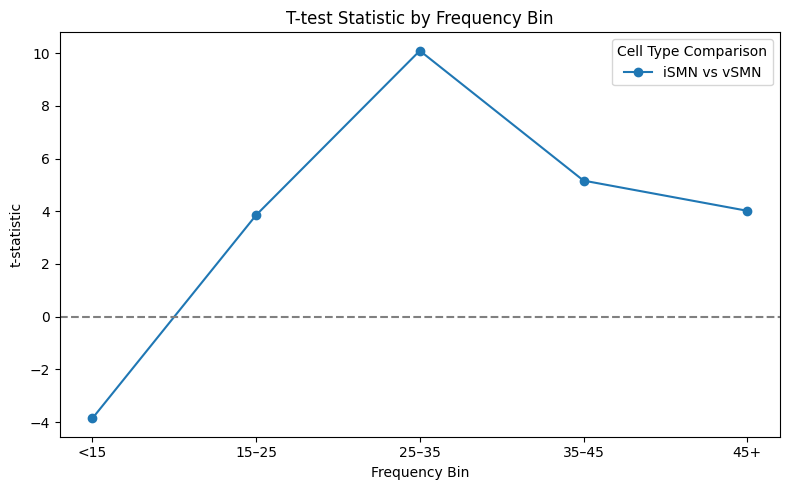

In [ ]:
import matplotlib.pyplot as plt

def plot_tstats_by_freq(tstats_df, celltype_pair=None):
    """
    Plots t-statistics across frequency bins from a t-test results DataFrame.
    
    Parameters:
        tstats_df : pd.DataFrame
            Must contain columns: 'Freq Bin', 'Cell Type_1', 'Cell Type_2', 't_stat', 'p_value'
        celltype_pair : tuple (optional)
            Filter to a specific pair, e.g. ('iSMN', 'vSMN')
    """
    # Optional filter
    if celltype_pair:
        tstats_df = tstats_df[
            ((tstats_df['Cell Type_1'] == celltype_pair[0]) & (tstats_df['Cell Type_2'] == celltype_pair[1])) |
            ((tstats_df['Cell Type_1'] == celltype_pair[1]) & (tstats_df['Cell Type_2'] == celltype_pair[0]))
        ]

    # Sort frequency bins in a logical order
    freq_order = ['<15', '15–25', '25–35', '35–45', '45+']
    tstats_df['Freq Bin'] = pd.Categorical(tstats_df['Freq Bin'], categories=freq_order, ordered=True)
    tstats_df = tstats_df.sort_values('Freq Bin')

    # Create labels for each pair
    tstats_df['Comparison'] = tstats_df['Cell Type_1'] + ' vs ' + tstats_df['Cell Type_2']

    plt.figure(figsize=(8, 5))

    for label in tstats_df['Comparison'].unique():
        df_subset = tstats_df[tstats_df['Comparison'] == label]
        plt.plot(df_subset['Freq Bin'], df_subset['t_stat'], marker='o', label=label)

    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Frequency Bin')
    plt.ylabel('t-statistic')
    plt.title('T-test Statistic by Frequency Bin')
    plt.legend(title='Cell Type Comparison')
    plt.tight_layout()
    plt.show()
plot_tstats_by_freq(ttest_results_celltype3)  # plot all comparisons


In [ ]:
ttest_df_corrected, corrected_alpha = bonferroni_correction(ttest_results_celltype3)
print(f"Corrected alpha threshold: {corrected_alpha}")


Corrected alpha threshold: 0.01


In [ ]:
plot_ttest_heatmap_matplotlib(
    ttest_df_corrected,
    freq_col='Freq Bin',
    group_col='Cell Type',         # or 'Rin Bin', depending on your test
    compare_col1='Cell Type_1',      # or 'Cell Type_1'
    compare_col2='Cell Type_2',      # or 'Cell Type_2'
    value_col='p_value_corrected',
    alpha=0.05,
    title="T-test Bonferroni-corrected p-values"
)


KeyError: 'Cell Type'

In [ ]:
ttest_results_celltype

""


0.0016666666666666668


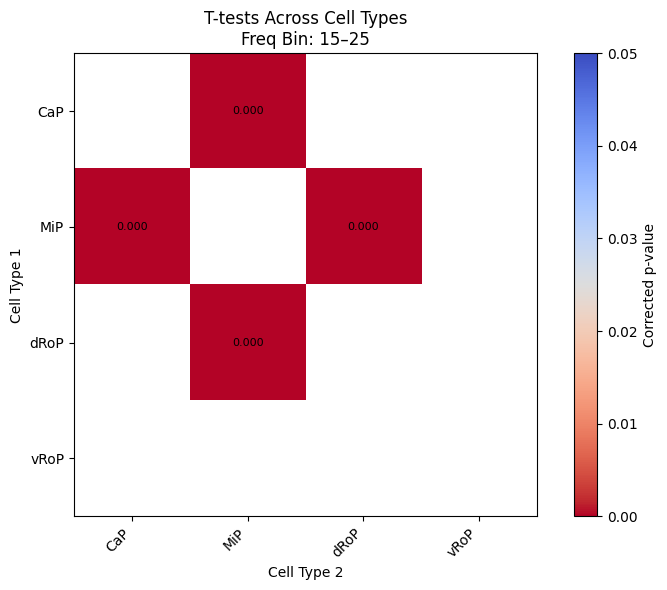

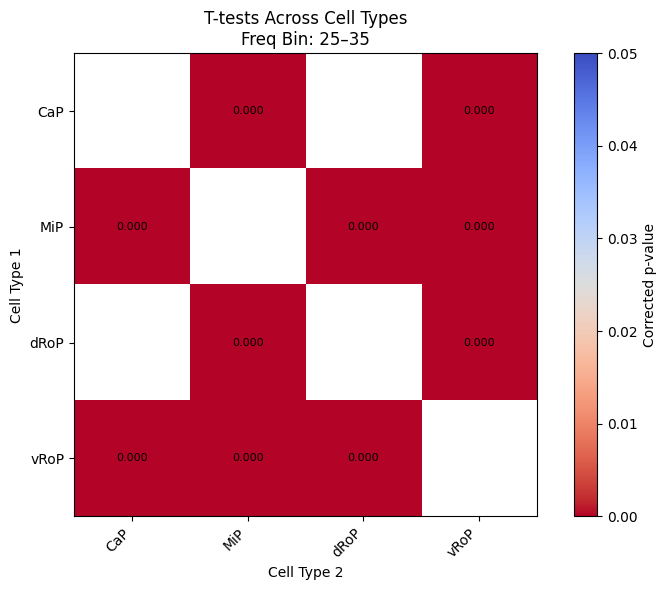

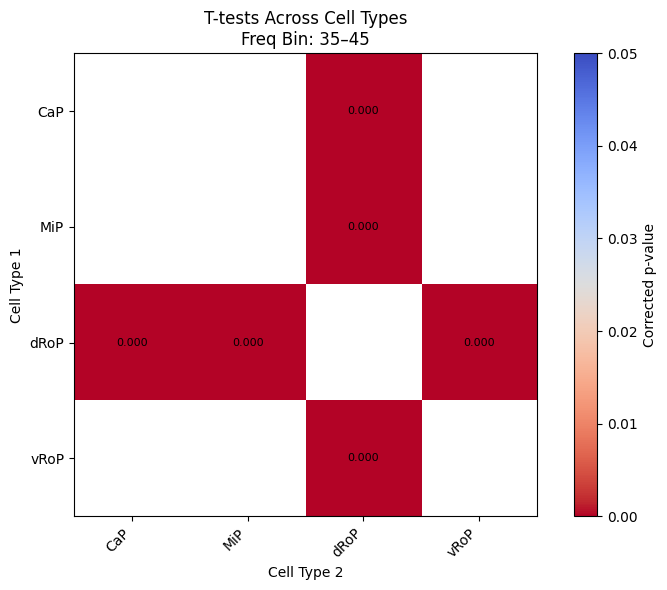

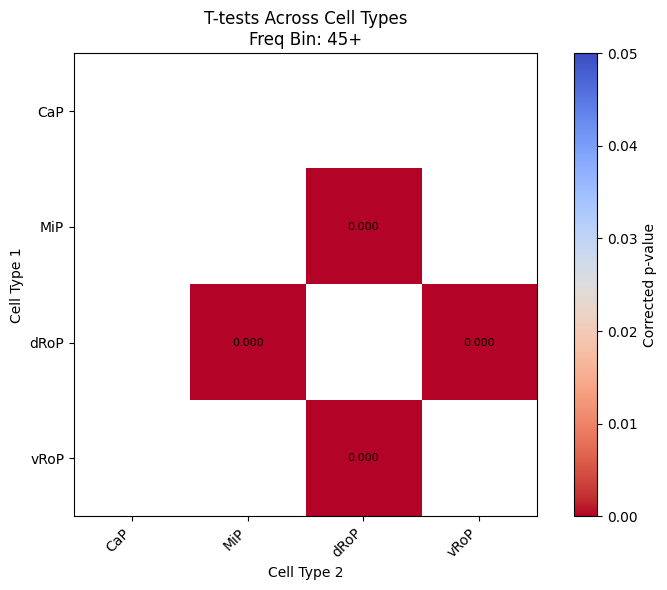

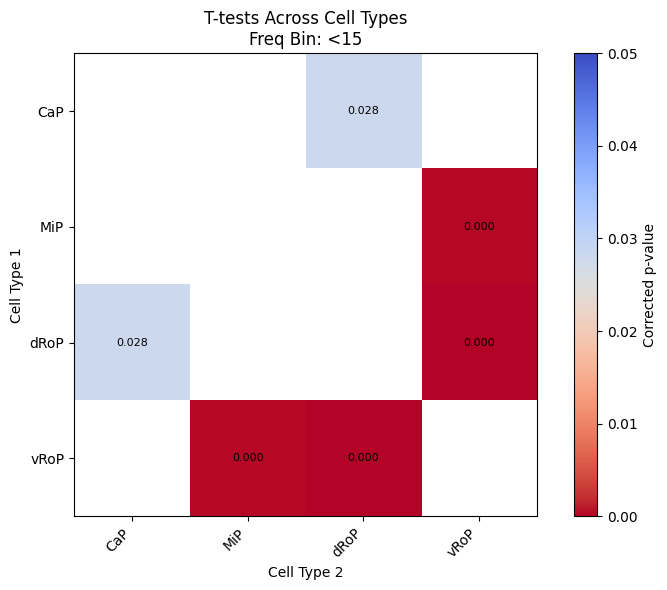

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_celltype_ttests_across_freqs(ttest_df, alpha=0.05, title=None):
    """
    Visualizes Bonferroni-corrected t-test p-values between cell types across frequency bins.
    
    Parameters:
        ttest_df: pd.DataFrame with columns ['Cell Type_1', 'Cell Type_2', 'Freq Bin', 'p_value_corrected']
        alpha: significance threshold
        title: optional title
    """
    freq_bins = sorted(ttest_df['Freq Bin'].unique())
    cell_types = sorted(set(ttest_df['Cell Type_1']).union(ttest_df['Cell Type_2']))
    idx_map = {ct: i for i, ct in enumerate(cell_types)}
    size = len(cell_types)
    
    for freq in freq_bins:
        # Init symmetric matrix
        matrix = np.full((size, size), np.nan)
        
        df = ttest_df[ttest_df['Freq Bin'] == freq]
        
        for _, row in df.iterrows():
            i = idx_map[row['Cell Type_1']]
            j = idx_map[row['Cell Type_2']]
            val = row['p_value_corrected']
            matrix[i, j] = val
            matrix[j, i] = val
        
        fig, ax = plt.subplots(figsize=(8, 6))
        
        masked_matrix = np.ma.masked_where((matrix >= alpha) | np.isnan(matrix), matrix)
        cmap = plt.cm.coolwarm_r
        
        cax = ax.imshow(masked_matrix, interpolation='nearest', cmap=cmap, vmin=0, vmax=alpha)
        cbar = fig.colorbar(cax, ax=ax)
        cbar.set_label('Corrected p-value')
        
        ax.set_xticks(np.arange(size))
        ax.set_yticks(np.arange(size))
        ax.set_xticklabels(cell_types, rotation=45, ha='right')
        ax.set_yticklabels(cell_types)
        
        for i in range(size):
            for j in range(size):
                p = matrix[i, j]
                if not np.isnan(p) and p < alpha:
                    ax.text(j, i, f"{p:.3f}", ha='center', va='center', fontsize=8, color='black')
        
        ax.set_title(f"{title or 'T-tests Across Cell Types'}\nFreq Bin: {freq}")
        ax.set_xlabel("Cell Type 2")
        ax.set_ylabel("Cell Type 1")
        plt.tight_layout()
        plt.show()
# Example:
ttest_df_corrected, corrected_alpha = bonferroni_correction(ttest_results_celltype)
print(corrected_alpha)
plot_celltype_ttests_across_freqs(ttest_df_corrected, alpha=0.05)


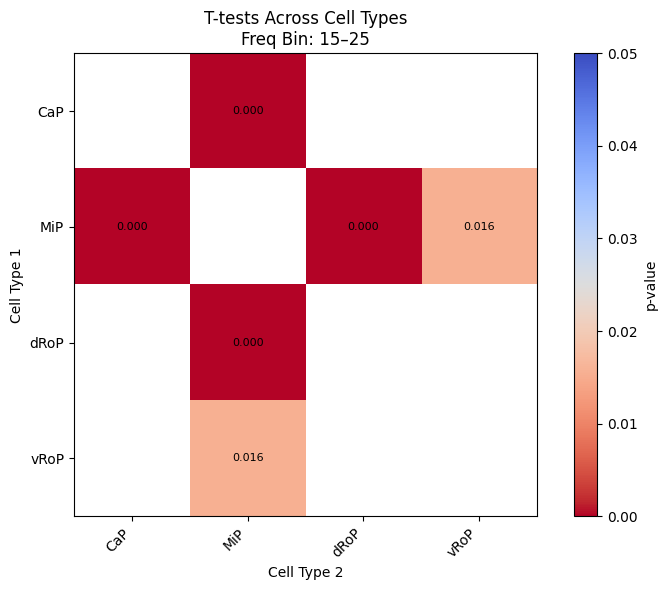

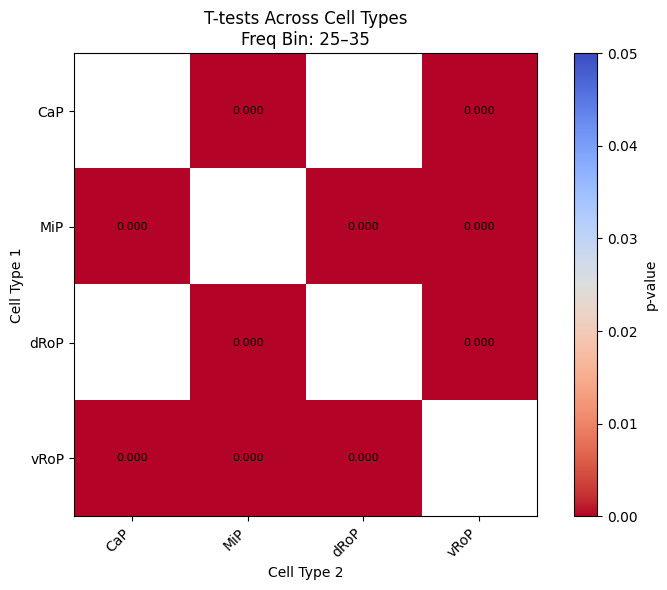

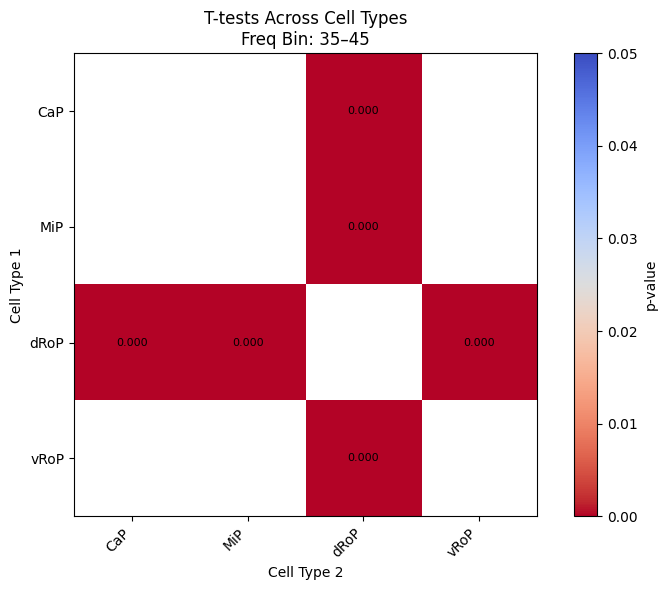

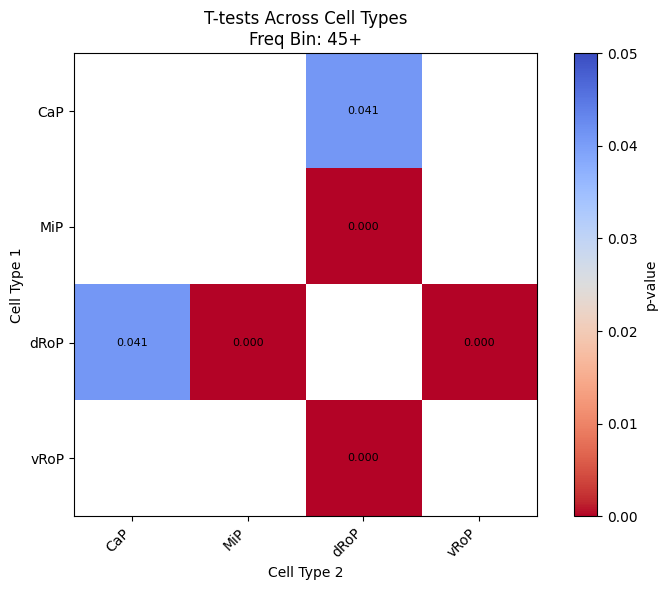

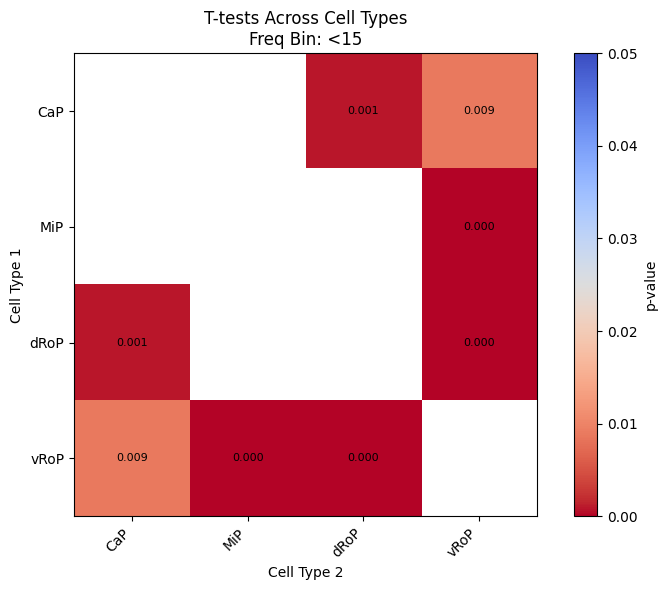

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_celltype_ttests_across_freqs1(ttest_df, alpha=0.05, title=None):
    """
    Visualizes Bonferroni-corrected t-test p-values between cell types across frequency bins.
    
    Parameters:
        ttest_df: pd.DataFrame with columns ['Cell Type_1', 'Cell Type_2', 'Freq Bin', 'p_value_corrected']
        alpha: significance threshold
        title: optional title
    """
    freq_bins = sorted(ttest_df['Freq Bin'].unique())
    cell_types = sorted(set(ttest_df['Cell Type_1']).union(ttest_df['Cell Type_2']))
    idx_map = {ct: i for i, ct in enumerate(cell_types)}
    size = len(cell_types)
    
    for freq in freq_bins:
        # Init symmetric matrix
        matrix = np.full((size, size), np.nan)
        
        df = ttest_df[ttest_df['Freq Bin'] == freq]
        
        for _, row in df.iterrows():
            i = idx_map[row['Cell Type_1']]
            j = idx_map[row['Cell Type_2']]
            val = row['p_value']
            matrix[i, j] = val
            matrix[j, i] = val
        
        fig, ax = plt.subplots(figsize=(8, 6))
        
        masked_matrix = np.ma.masked_where((matrix >= alpha) | np.isnan(matrix), matrix)
        cmap = plt.cm.coolwarm_r
        
        cax = ax.imshow(masked_matrix, interpolation='nearest', cmap=cmap, vmin=0, vmax=alpha)
        cbar = fig.colorbar(cax, ax=ax)
        cbar.set_label('p-value')
        
        ax.set_xticks(np.arange(size))
        ax.set_yticks(np.arange(size))
        ax.set_xticklabels(cell_types, rotation=45, ha='right')
        ax.set_yticklabels(cell_types)
        
        for i in range(size):
            for j in range(size):
                p = matrix[i, j]
                if not np.isnan(p) and p < alpha:
                    ax.text(j, i, f"{p:.3f}", ha='center', va='center', fontsize=8, color='black')
        
        ax.set_title(f"{title or 'T-tests Across Cell Types'}\nFreq Bin: {freq}")
        ax.set_xlabel("Cell Type 2")
        ax.set_ylabel("Cell Type 1")
        plt.tight_layout()
        plt.show()
# Example:
# ttest_df_corrected, corrected_alpha = bonferroni_correction(ttest_results_celltype)
# print(corrected_alpha)
# plot_celltype_ttests_across_freqs(ttest_results_celltype, alpha=0.05)



plot_celltype_ttests_across_freqs1(ttest_results_celltype)